In [2]:
# 5-12코드
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# 5-13코드
model = ResNet50(include_top=True,
                 weights="imagenet",
                 input_tensor=None,
                 input_shape=None,
                 pooling=None,
                 classes=1000)

102967424/102967424 [==============================] - 1s 0us/step


In [4]:
# 5-15코드
model.trainable = False
model = Sequential([model,
                    Dense(2, activation='sigmoid')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense (Dense)               (None, 2)                 2002      
                                                                 
Total params: 25638714 (97.80 MB)
Trainable params: 2002 (7.82 KB)
Non-trainable params: 25636712 (97.80 MB)
_________________________________________________________________


In [5]:
# 5-16코드
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()

#시간이 오래 걸리면 구글 드라이브에서 불러오기로 변경해서 진행해주세요.
#from google.colab import drive
#drive.mount('/content/drive/')

#chap5 > data 폴더에 있는 catanddog.zip 파일을 선택합니다.
train_dir = "catanddog.zip"
!unzip catanddog.zip               #압축 풀기

Saving catanddog.zip to catanddog.zip
Archive:  catanddog.zip
   creating: train/
   creating: train/Cat/
  inflating: train/Cat/0.jpg         
  inflating: train/Cat/1.jpg         
  inflating: train/Cat/10.jpg        
  inflating: train/Cat/11.jpg        
  inflating: train/Cat/12.jpg        
  inflating: train/Cat/13.jpg        
  inflating: train/Cat/14.jpg        
  inflating: train/Cat/15.jpg        
  inflating: train/Cat/16.jpg        
  inflating: train/Cat/17.jpg        
  inflating: train/Cat/18.jpg        
  inflating: train/Cat/19.jpg        
  inflating: train/Cat/2.jpg         
  inflating: train/Cat/20.jpg        
  inflating: train/Cat/21.jpg        
  inflating: train/Cat/22.jpg        
  inflating: train/Cat/23.jpg        
  inflating: train/Cat/24.jpg        
  inflating: train/Cat/25.jpg        
  inflating: train/Cat/26.jpg        
  inflating: train/Cat/27.jpg        
  inflating: train/Cat/28.jpg        
  inflating: train/Cat/29.jpg        
  inflating: train/C

In [7]:
# 5-17코드
BATCH_SIZE = 32
image_height = 224
image_width = 224
train_dir = "train/"
valid_dir = "validation/"


train = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                                    target_size=(224,224), #colab에서 inputshape 오류 발생으로, tage_size shape 변경
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )
history=model.fit(train_generator,
          epochs=10,
          validation_data=valid_generator,
          verbose=2)

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Epoch 1/10
13/13 - 21s - loss: 0.6931 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000 - 21s/epoch - 2s/step
Epoch 2/10
13/13 - 6s - loss: 0.6930 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000 - 6s/epoch - 481ms/step
Epoch 3/10
13/13 - 5s - loss: 0.6930 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000 - 5s/epoch - 391ms/step
Epoch 4/10
13/13 - 6s - loss: 0.6930 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000 - 6s/epoch - 479ms/step
Epoch 5/10
13/13 - 5s - loss: 0.6928 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000 - 5s/epoch - 388ms/step
Epoch 6/10
13/13 - 6s - loss: 0.6928 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000 - 6s/epoch - 466ms/step
Epoch 7/10
13/13 - 5s - loss: 0.6927 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000 - 5s/epoch - 394ms/step
Epoch 8/10
13/13 - 5s - loss: 0.6925 - accuracy: 0.5273 - val_loss

Text(0.5, 1.0, '오차')

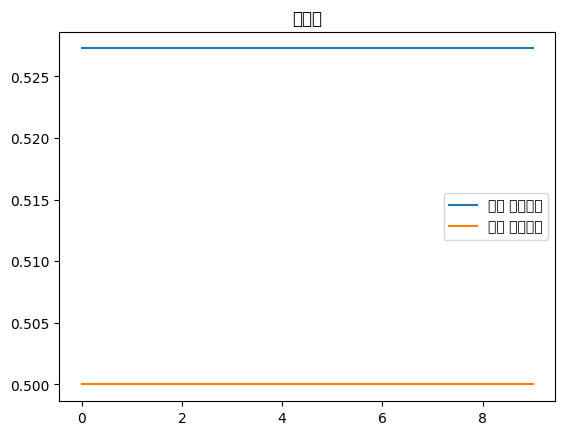

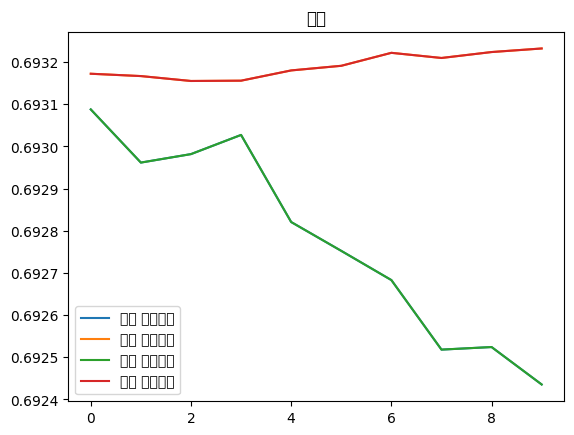

In [10]:
# 5-18코드
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()


plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')


plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')

1/1 [==============================] - 1s 1s/step


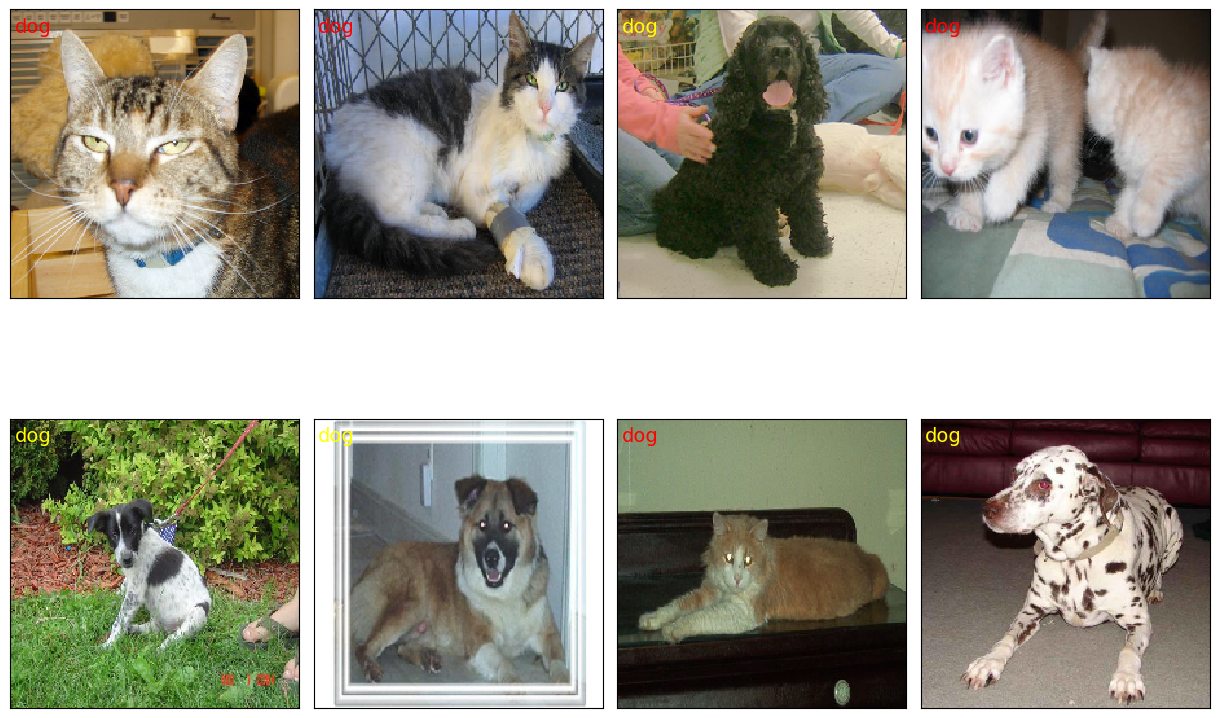

In [11]:
# 5-19코드
class_names = ['cat', 'dog']
validation, label_batch  = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

In [12]:
# 5-20코드
import tensorflow_hub as hub
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4",
                   input_shape=(224, 224, 3),
                   trainable=False),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [13]:
# 5-21코드
train = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [14]:
# 5-29코드
history=model.fit(train_generator,
          epochs=10,
          validation_data=valid_generator,
          verbose=2)

Epoch 1/10
13/13 - 20s - loss: 0.5300 - accuracy: 0.7792 - val_loss: 0.1605 - val_accuracy: 0.9898 - 20s/epoch - 2s/step
Epoch 2/10
13/13 - 8s - loss: 0.1346 - accuracy: 0.9766 - val_loss: 0.0758 - val_accuracy: 0.9796 - 8s/epoch - 586ms/step
Epoch 3/10
13/13 - 9s - loss: 0.0786 - accuracy: 0.9766 - val_loss: 0.0605 - val_accuracy: 0.9898 - 9s/epoch - 728ms/step
Epoch 4/10
13/13 - 7s - loss: 0.0580 - accuracy: 0.9844 - val_loss: 0.0516 - val_accuracy: 0.9796 - 7s/epoch - 534ms/step
Epoch 5/10
13/13 - 6s - loss: 0.0434 - accuracy: 0.9844 - val_loss: 0.0463 - val_accuracy: 0.9898 - 6s/epoch - 470ms/step
Epoch 6/10
13/13 - 7s - loss: 0.0369 - accuracy: 1.0000 - val_loss: 0.0446 - val_accuracy: 0.9796 - 7s/epoch - 539ms/step
Epoch 7/10
13/13 - 6s - loss: 0.0441 - accuracy: 0.9844 - val_loss: 0.0424 - val_accuracy: 0.9898 - 6s/epoch - 466ms/step
Epoch 8/10
13/13 - 7s - loss: 0.0317 - accuracy: 0.9922 - val_loss: 0.0407 - val_accuracy: 0.9898 - 7s/epoch - 558ms/step
Epoch 9/10
13/13 - 7s - l

Text(0.5, 1.0, '오차')

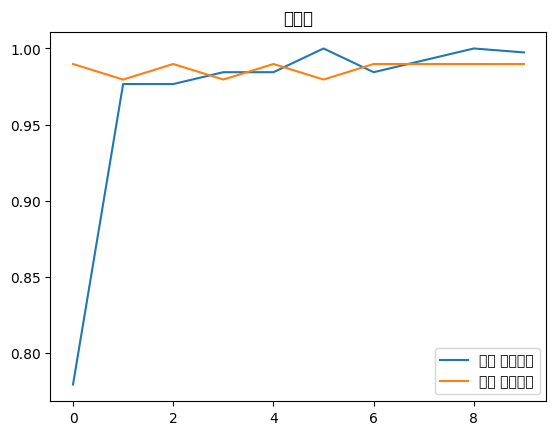

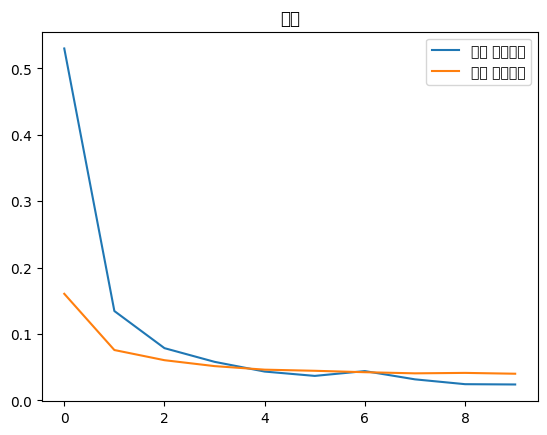

In [15]:
# 5-30코드
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()

plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')

1/1 [==============================] - 3s 3s/step


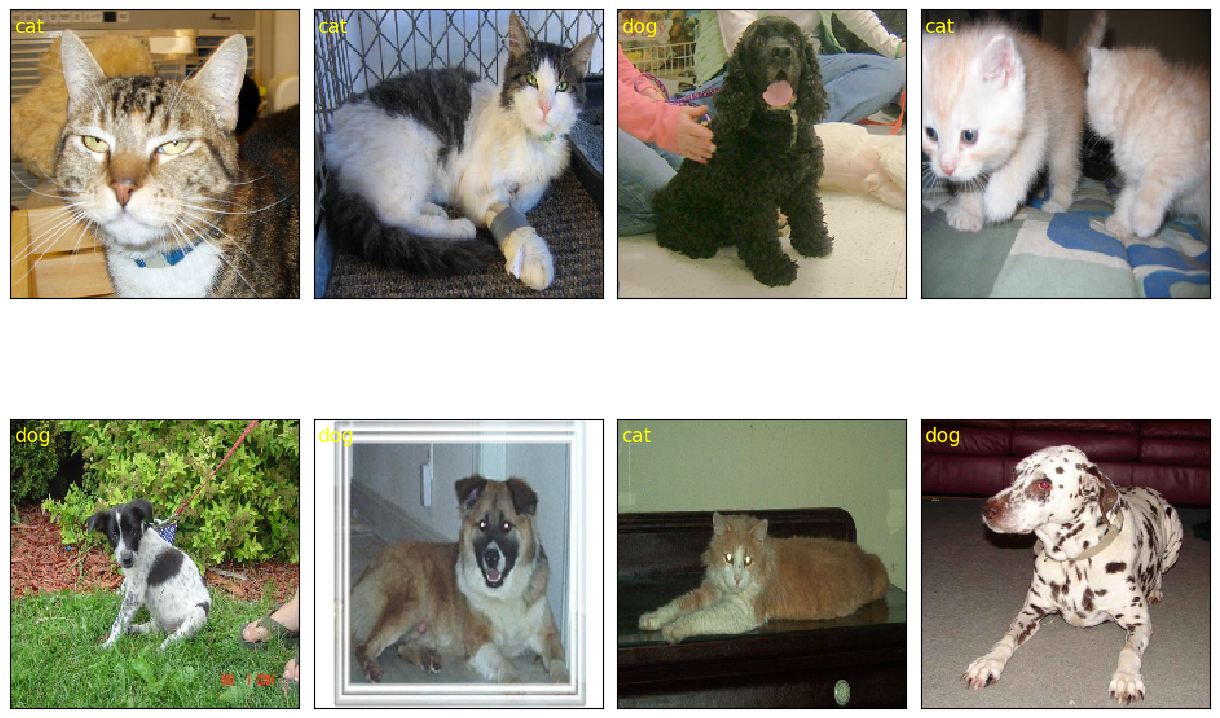

In [16]:
# 5-31코드
class_names = ['cat', 'dog']
validation, label_batch  = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)